In [1]:
import pymongo

In [2]:
def_conn = "mongodb://localhost:27017/"
db_name = "my_first_db"

In [7]:
# establishing a connection with mongoDB
client = pymongo.MongoClient(def_conn)

# creating a DB
db = client[db_name]

In [8]:
# right now we cannot see the DB name in the list

client.list_database_names()

['admin', 'config', 'local']

In [13]:
# in mongoBD data is added in the form of collections
# creating a collection
Col_Name = "First_Products"
collection = db[Col_Name]

In [14]:
# insert data into collections

record = {'companyName': 'ABC',
         'product': 'AI',
         'courseOffered': 'DL for CV'}

collection.insert_one(record)

In [15]:
# check whether collection exists in DB or not

# create a function 
def checkExistence_COL(Col_Name, db_name, DB):
    """It verifies the existence of collection name in a database"""
    collection_list = DB.list_collection_names()
    
    if Col_Name in collection_list:
        print(f"Collection:'{Col_Name}' in Database:'{db_name}' exists")
        return True
    
    print(f"Collection:'{Col_Name}' in Database:'{db_name}' does not exists OR \n\
    no documents are present in the collection")
    return False

# check whether collection exists in DB or not
_ = checkExistence_COL(Col_Name=Col_Name, db_name=db_name, DB=db)

Collection:'First_Products' in Database:'my_first_db' exists


In [16]:
# inserting multiple data into DB

new_records = [
    {'companyName': 'ABC',
     'product': 'Affordable AI',
     'courseOffered': 'Machine Learning with Deployment'},
    
    {'companyName': 'XYZ',
     'product': 'Affordable AI',
     'courseOffered': 'Deep Learning for NLP and Computer vision'},
    
    {'companyName': 'XYZ',
     'product': 'Master Program',
     'courseOffered': 'Data Science Masters Program'}
]

rec = collection.insert_many(new_records)

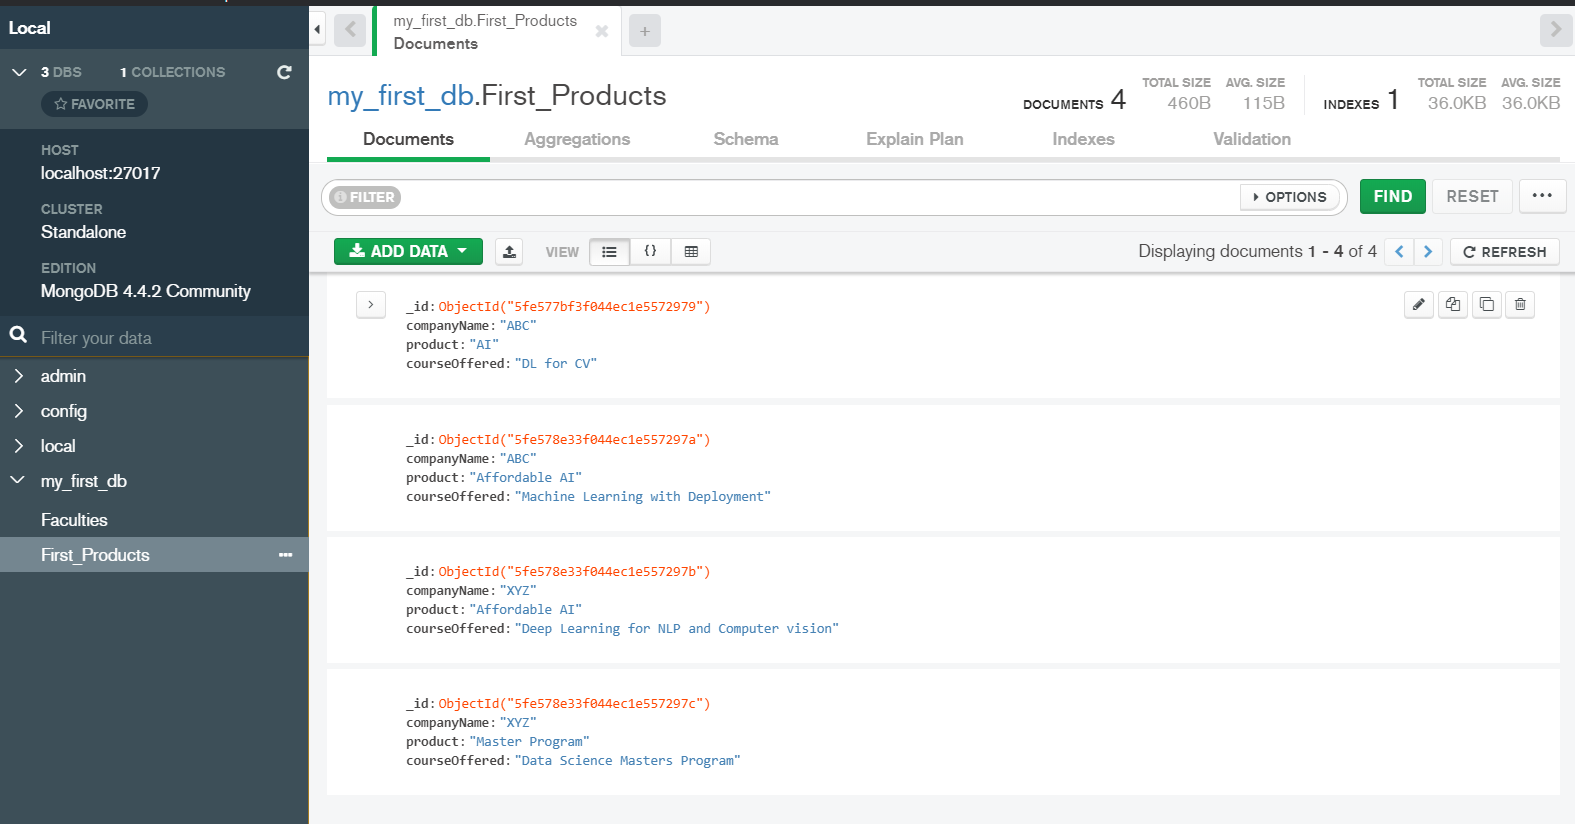

In [17]:
# mongodb generates unique id for each record entered
# print the unique ID that of the record that we have inserted -
inserted_IDs = rec.inserted_ids

for idx, unique_ids in enumerate(inserted_IDs):
    print(f"{idx}. {unique_ids}")

0. 5fe578e33f044ec1e557297a
1. 5fe578e33f044ec1e557297b
2. 5fe578e33f044ec1e557297c


In [19]:
# overwriting the default unique id generated by mongodb

Col_Name = "Faculties"
faculties = db[Col_Name]

list_of_records_user_defined_id = [
    {"_id": "1",
    "companyName": "ABC",
    "Faculty": "Hari"},
    {"_id": "2",
    "companyName": "ABC",
    "Faculty": "Pavan"},
]

faculties_record = faculties.insert_many(list_of_records_user_defined_id)

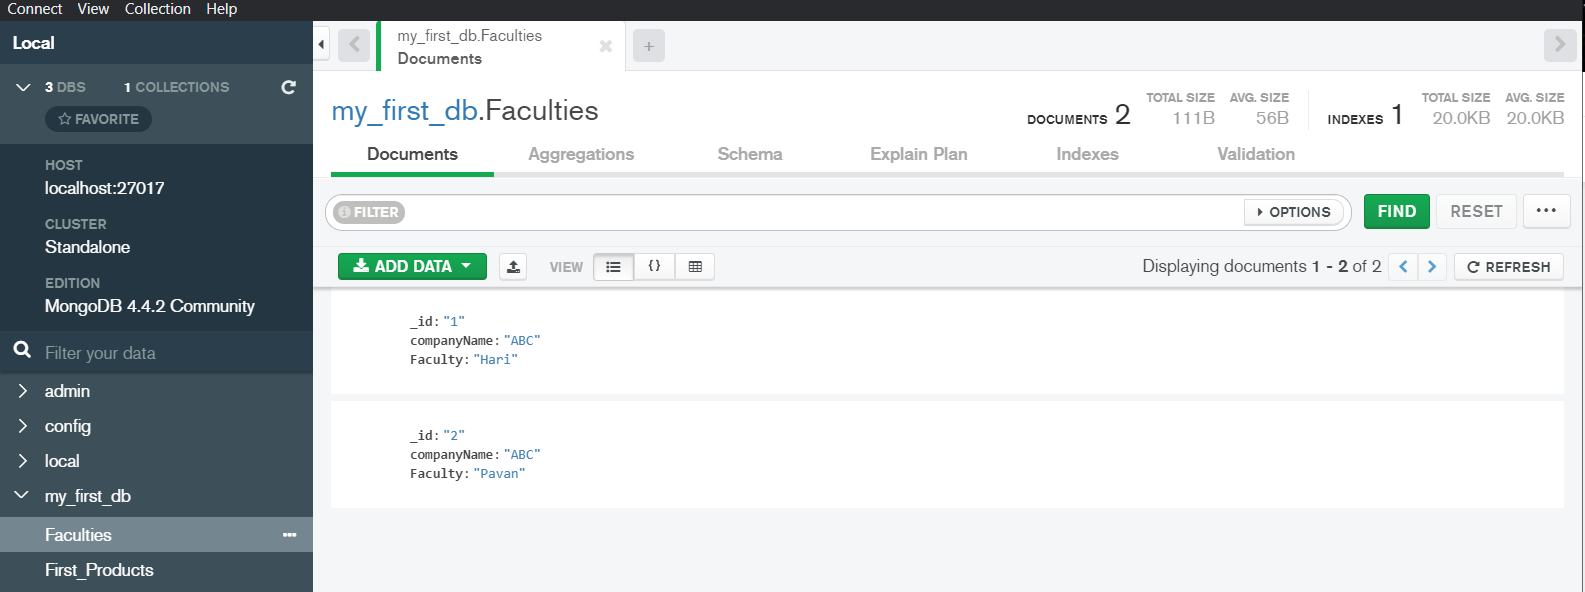

In [20]:
# finding details in DB

find_first_record = faculties.find_one() # first record in the  faculties collection

print(f"The first record of collection: \n{Col_Name} is=\
\n{find_first_record}")

The first record of collection: 
Faculties is=
{'_id': '1', 'companyName': 'ABC', 'Faculty': 'Hari'}


In [25]:
# finding details in DB
Col_Name = "First_Products"
First_Products = db[Col_Name]
find_first_record = First_Products.find_one() # first record in the  faculties collection

print(f"The first record of collection: \n{Col_Name} is=\
\n{find_first_record}")

The first record of collection: 
First_Products is=
{'_id': ObjectId('5fe577bf3f044ec1e5572979'), 'companyName': 'ABC', 'product': 'AI', 'courseOffered': 'DL for CV'}


In [26]:
# find all the record at once present in the record with all the fields

all_record = faculties.find()

for idx, record in enumerate(all_record):
    print(f"{idx}: {record}")

0: {'_id': '1', 'companyName': 'ABC', 'Faculty': 'Hari'}
1: {'_id': '2', 'companyName': 'ABC', 'Faculty': 'Pavan'}


In [27]:
# find all the record at once present in the record with SPECIFIC fields
all_record = faculties.find({}, {"Faculty"})

for idx, record in enumerate(all_record):
    print(f"{idx}: {record}")

0: {'_id': '1', 'Faculty': 'Hari'}
1: {'_id': '2', 'Faculty': 'Pavan'}


In [28]:
# filter data with id = 1

query1 = {"_id": '1'}

results = faculties.find(query1)
for data in results:
    print(data)

{'_id': '1', 'companyName': 'ABC', 'Faculty': 'Hari'}


In [29]:
# filter data with id>=2

query2 = {"_id": {"$gte": "2"}}

results = faculties.find(query2)
for data in results:
    print(data)

{'_id': '2', 'companyName': 'ABC', 'Faculty': 'Pavan'}


In [30]:
# Delete
query_delete = {"Faculty": "Hari"}

faculties.delete_one(query_delete)

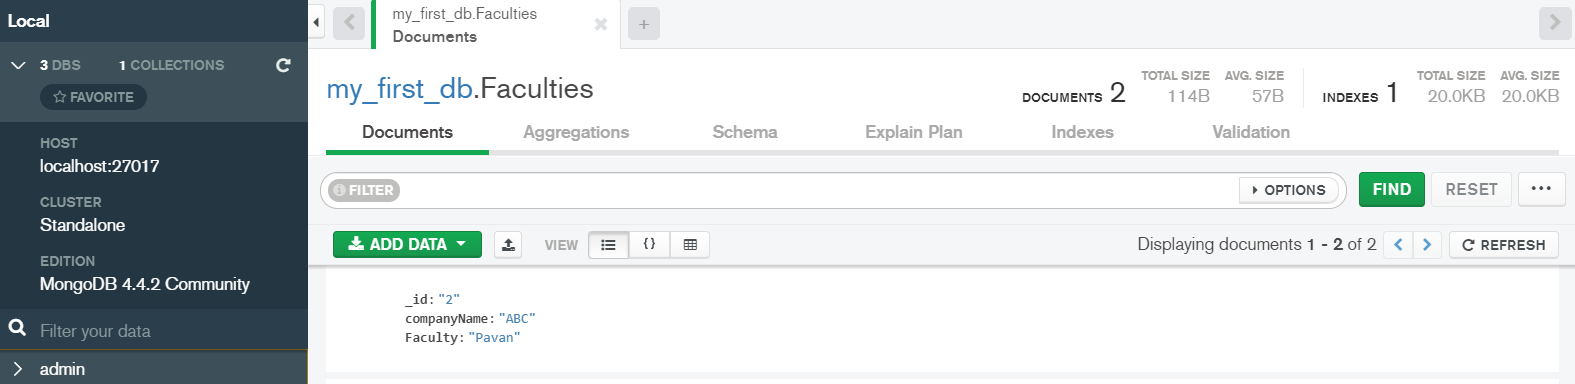

In [37]:
# Lets add some random data in faculties
random_data = [
    {'_id': '3', 'companyName': 'ABC', 'Faculty': 'XYZ'},
    {'_id': '4', 'companyName': 'XYZ', 'Faculty': 'ABC'},
    {'_id': '5', 'companyName': 'ABC', 'Faculty': 'PQR'},
]

faculties.insert_many(random_data)

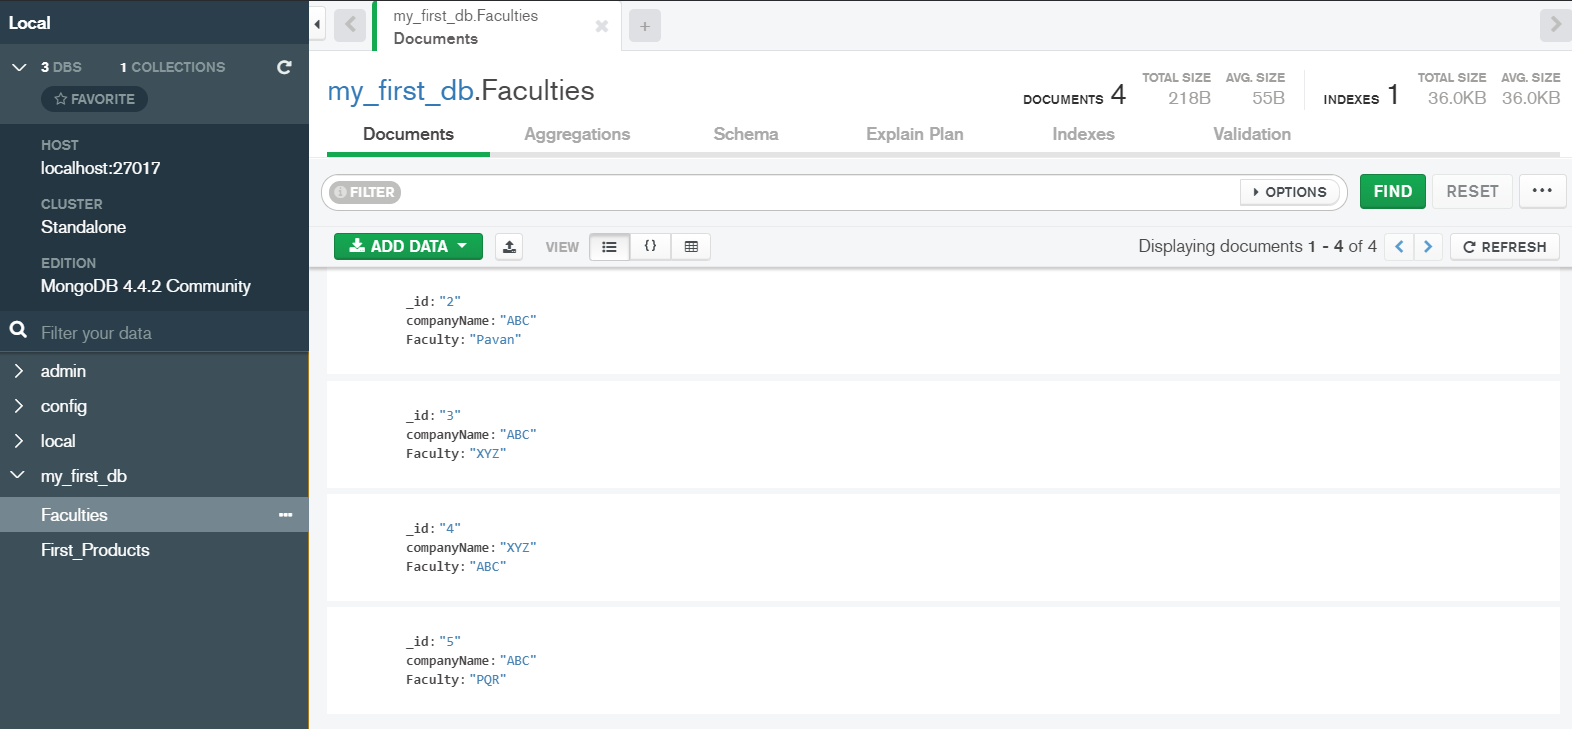

In [38]:
# lets delete multiple record
multi_query_delete = {"_id": {"$gte": "4"}}

faculties.delete_many(multi_query_delete)

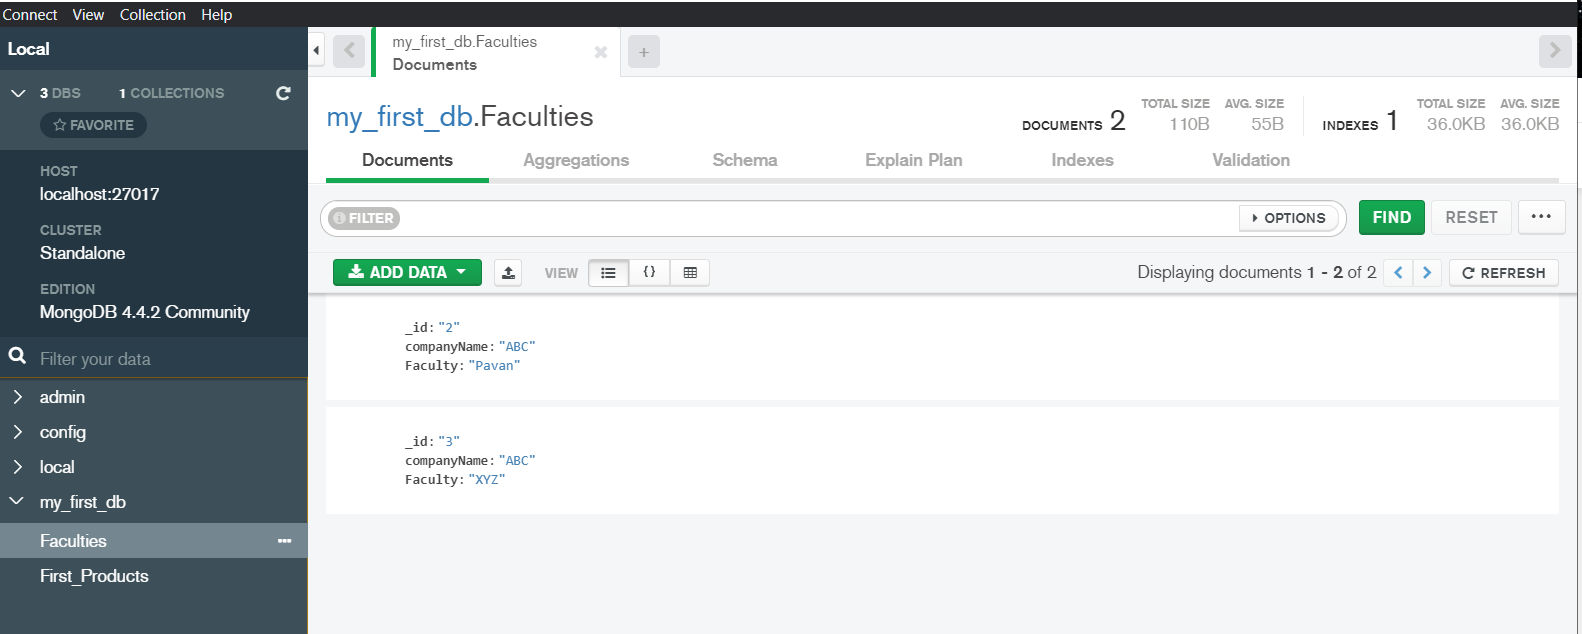

In [39]:
# drop the entire Faculty Collection

faculties.drop()

In [44]:
# Show all the records in First_Products

Col_Name = "First_Products"

products = db[Col_Name]

all_record = products.find()

for idx, record in enumerate(all_record):
    print(f"{record}\n")

{'_id': ObjectId('5fe577bf3f044ec1e5572979'), 'companyName': 'ABC', 'product': 'AI', 'courseOffered': 'DL for CV'}

{'_id': ObjectId('5fe578e33f044ec1e557297a'), 'companyName': 'ABC', 'product': 'Affordable AI', 'courseOffered': 'Machine Learning with Deployment'}

{'_id': ObjectId('5fe578e33f044ec1e557297b'), 'companyName': 'XYZ', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for NLP and Computer vision'}

{'_id': ObjectId('5fe578e33f044ec1e557297c'), 'companyName': 'XYZ', 'product': 'Master Program', 'courseOffered': 'Data Science Masters Program'}



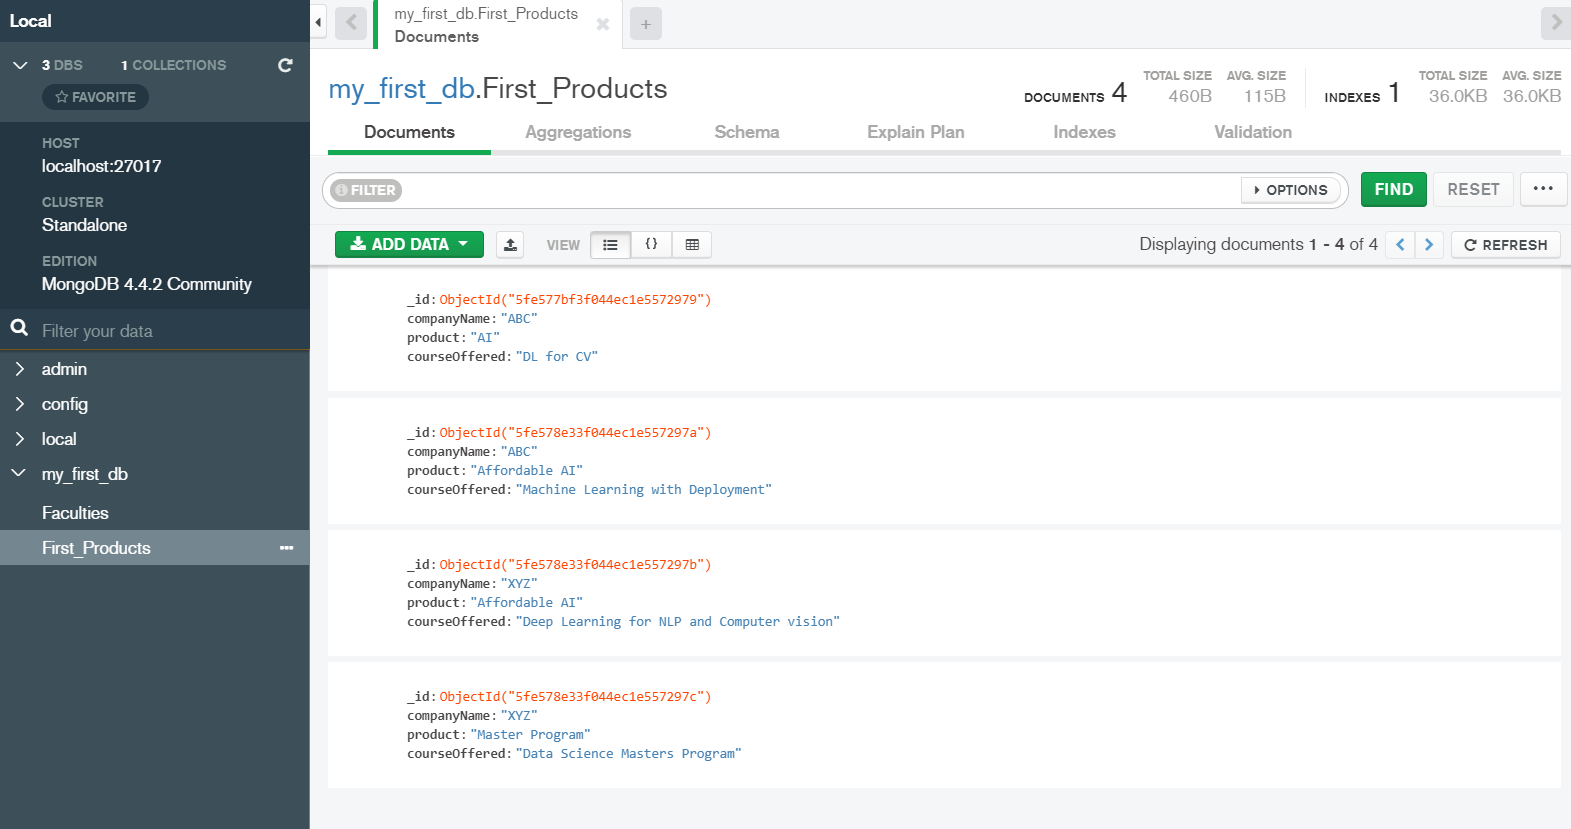

In [46]:
# Updating the data

old = {'companyName': 'ABC'}
new = {"$set":{'companyName': 'ABCD'}}
               
products.update_one(old, new)

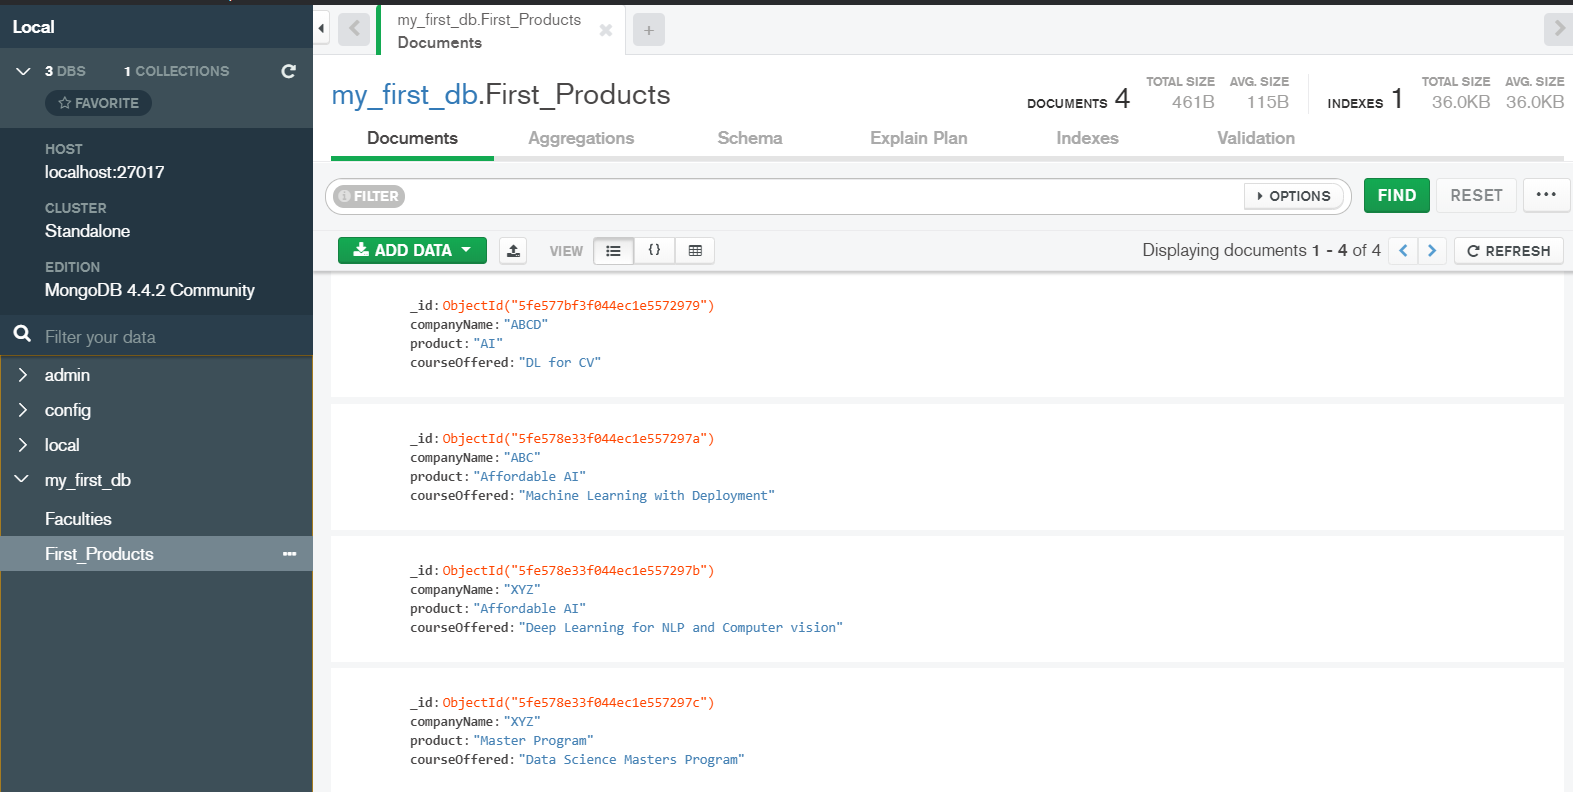

In [47]:
# view N number of records

N_records = 3

N_record = products.find().limit(N_records)

for idx, record in enumerate(N_record):
    print(f"{record}\n")

{'_id': ObjectId('5fe577bf3f044ec1e5572979'), 'companyName': 'ABCD', 'product': 'AI', 'courseOffered': 'DL for CV'}

{'_id': ObjectId('5fe578e33f044ec1e557297a'), 'companyName': 'ABC', 'product': 'Affordable AI', 'courseOffered': 'Machine Learning with Deployment'}

{'_id': ObjectId('5fe578e33f044ec1e557297b'), 'companyName': 'XYZ', 'product': 'Affordable AI', 'courseOffered': 'Deep Learning for NLP and Computer vision'}

